# Lending Club Case Study

In [23]:
#importing all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

### 1.Data Loading and Data Understanding

In [144]:
#read the csv file
lending_club_df = pd.read_csv("C:\\Users\\DELL\\Desktop\\LendingClubCaseStudy\\loan.csv")

In [145]:
#printing the first five rows of the data frame
lending_club_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [146]:
#checking for all the the null values present in each columns
lending_club_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### 2. Preprocessing Steps.
The CSV file contains many null columns with null values. The null columns can be directly removed

In [147]:
#droping all the columns with null values.
lending_club_df.dropna(axis = 1, how = 'all', inplace = True)
lending_club_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


##### The CSV file now contains many columns with single strings which will not be relevant in our case study analysis, so dropping them.

In [148]:
lending_club_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
lending_club_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


##### The columns finally left have date which doesnot correspond to analysis we are performing here:
 Columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" can be dropped.

In [149]:
lending_club_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d"], axis = 1, inplace = True)
lending_club_df.shape

(39717, 41)

##### List of post-approval features which are not relevant in our current analysis
 delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,chargeoff_within_12_mths,mths_since_last_delinq,mths_since_last_record

In [150]:
lending_club_df.drop([ "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
lending_club_df.shape

(39717, 21)

##### The Analysis is to find who is likely to default the loan which requires data only for the cases for whom the loan is either totally paid or defaulters
 The data for whom the loan is currently ongoing can be dropped

In [151]:
# Storing the data with no current on going loan in the lending_club data frame
lending_club_df = lending_club_df[~(lending_club_df['loan_status'] == 'Current')]
lending_club_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [152]:
#checking for any further data with 'loan status' as 'current'
lending_club_df[lending_club_df['loan_status'] == 'Current']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc


### 3. Missing Value Check

#### Need to treat the null values present in column 'emp_length'

In [153]:
lending_club_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [154]:
#checking for the current data type of the 'emp_length' column
lending_club_df['emp_length'].dtype

dtype('O')

#### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.
 So we can  assign the value of mode to the null values in the column. The missing values are in very low percentage. So replacing with the mode value will not affect much in the analysis

In [155]:
#Fill all the null values with the mode value
lending_club_df.emp_length.fillna(lending_club_df.emp_length.mode()[0], inplace = True)
lending_club_df.emp_length.isna().sum()

0

In [156]:
lending_club_df['emp_length'].dtype

dtype('O')

In [157]:
lending_club_df['emp_length'].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### Need to impute the left over data from column emp_length
•	The data we have contains emp_length as >10 years which we will consider as 10                                
•	The data that contains emp_length as <1 year we will consider them as 0                              
•	The rest of the data containing the number of years we will only store the numeric values in the column emp_length
 

In [158]:
# lambda operation to store 0 if <1 yr , 10 if >10yr and rest replace the respective data with only numeric data of emp_length
lending_club_df['emp_length'] = pd.to_numeric(lending_club_df['emp_length'].apply(lambda x: 0 if '<' in x.split()[0] else (x.split('+')[0] if '+' in x else x.split()[0]) ) )

In [159]:
lending_club_df['emp_length'].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [160]:
#checking for all the the null values present in each columns for further data cleaning 
lending_club_df.isnull().sum()

loan_amnt               0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util             50
total_acc               0
dtype: int64

#### Need to impute the left over data from column revol_util
•	The data we have contains some null values, which are very less in number and can safely be dropped                          •	The data that we have after removing the null values contains '%' which needs to removed with only the numeric value present          

In [161]:
lending_club_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
lending_club_df.revol_util.isna().sum()

0

In [162]:
#removing the '%' and only keeping the numeric values
lending_club_df.revol_util = pd.to_numeric(lending_club_df.revol_util.apply(lambda x: x.split('%')[0]))

In [163]:
lending_club_df['revol_util'].value_counts()

0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [141]:
#checking for all the the null values present in each columns and currently it shows that there are no null values present in any of the remaining columns
lending_club_CS.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

#### Need to impute the left over data from column int_rate
 •	The data that we have  contains '%' which needs to removed with only the numeric value present

In [164]:
lending_club_CS.int_rate = pd.to_numeric(lending_club_CS.int_rate.apply(lambda x : x.split('%')[0]))

In [166]:
lending_club_CS['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

#### So finally all the data cleaning is done,  irrelavant columns are removed ,  null values are imputed and taken care.

### 4. Outliers Treatment


##### Lets first check the data for 'annual_inc'  if any outliers are present or not. We will plot a box plot to check the presence of outliers.

<AxesSubplot:ylabel='annual_inc'>

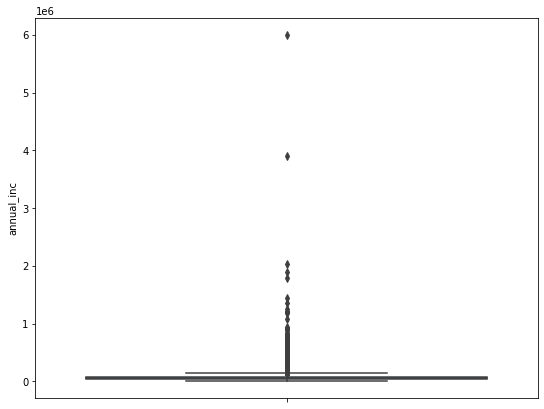

In [170]:
plt.figure(figsize = [ 9 , 7])
sns.boxplot(y = lending_club_CS['annual_inc'])

##### The above box plot clearly shows the presence of outliers.

###### On Checking the quantile info at different points:
•	It is seen that after 95 percentile there is a huge and abrupt increase in value for small quantile variation.      
•	So we will consider threshold for removing outliers are 0.95 percentile.


In [171]:
quantile_info = lending_club_CS.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [174]:
annual_inc_per95 =  lending_club_CS.annual_inc.quantile(0.95)

In [175]:
lending_club_CS  =  lending_club_CS [  lending_club_CS.annual_inc <= annual_inc_per95 ]

##### Now ploting again the same box plot shows fine results

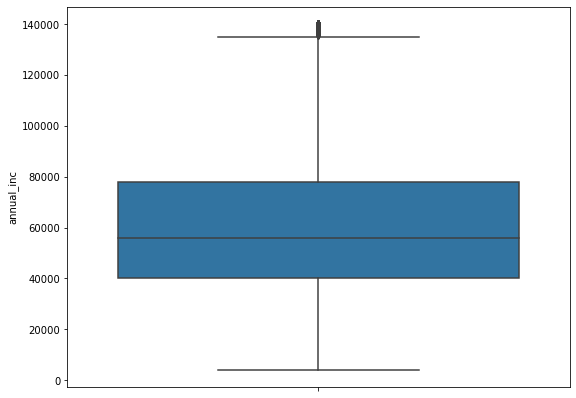

In [177]:
plt.figure(figsize = [ 9 , 7])
sns.boxplot(y = lending_club_CS['annual_inc'])
plt.show()

##### Lets now check for the presence of outliers for loan_amnt ,  funded_amnt_inv ,  dti

In [187]:
lending_club_CS.loan_amnt.quantile([0.90,0.95,0.96,0.97,0.98,0.99])

0.90    20000.0
0.95    25000.0
0.96    25000.0
0.97    25475.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

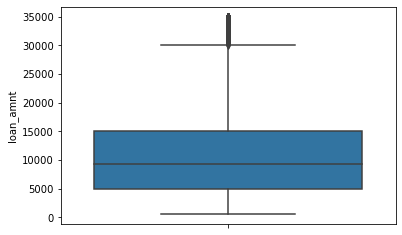

In [205]:
sns.boxplot(y = lending_club_CS['loan_amnt'])
plt.show()

In [188]:
lending_club_CS.funded_amnt_inv.quantile([0.90,0.95,0.96,0.97,0.98,0.99])

0.90    19750.000000
0.95    23949.287805
0.96    24664.436978
0.97    24975.000000
0.98    27953.287538
0.99    31966.803281
Name: funded_amnt_inv, dtype: float64

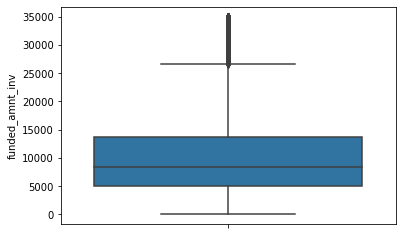

In [204]:
sns.boxplot(y = lending_club_CS['funded_amnt_inv'])
plt.show()

In [189]:
lending_club_CS.dti.quantile([0.90,0.95,0.96,0.97,0.98,0.99])

0.90    22.390
0.95    23.860
0.96    24.190
0.97    24.540
0.98    24.880
0.99    26.659
Name: dti, dtype: float64

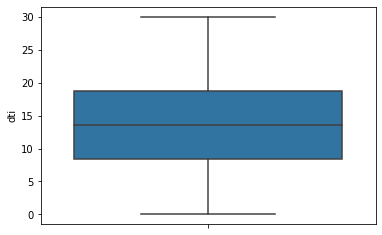

In [203]:
sns.boxplot(y = lending_club_CS['dti'])
plt.show()

##### From the above box plots for loan_amnt , funded_amnt_inv , dti it is observed:

•	There are some presence of values far from the distribution for loan_amnt , funded_amnt_inv but the plot is pretty continuous and therefore can be ignored.                                                        
•	Dti boxplot does  not show any presence of outliers.


# Categorical Data Analysis 

### a)Analyzing home ownership
•	We see that there are 3 data with ownership type as NONE , so we replace them with OTHER.                           
•	We then segregate them on the basis of ‘Charged_off’ and ‘Full_Paid’ customers                                
•	Then plot them to check the trend difference if any.


In [193]:
#checking unique values for home_ownership
lending_club_CS['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [194]:
lending_club_CS [lending_club_CS.home_ownership == 'NONE']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
39318,10000,1228.06,36 months,7.75,312.22,A,A3,5,NONE,22200.0,...,Jan-08,Fully Paid,debt_consolidation,5.24,Apr-94,0,9,0,8.7,22
39659,4000,1925.00,36 months,9.64,128.41,B,B4,0,NONE,100000.0,...,Aug-07,Fully Paid,other,15.00,May-99,1,6,0,14.9,8
39660,2800,1625.00,36 months,8.70,88.65,B,B1,0,NONE,120000.0,...,Aug-07,Fully Paid,other,15.00,May-99,1,6,0,14.9,8


In [195]:
lending_club_CS.home_ownership.replace(to_replace = ['NONE'] , value = 'OTHER' , inplace = True   )

In [196]:
lending_club_CS [lending_club_CS.home_ownership == 'NONE']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc


In [197]:
lending_club_CS_charged_off = lending_club_CS [  lending_club_CS.loan_status == 'Charged Off']

In [206]:
lending_club_CS_fully_paid = lending_club_CS [  lending_club_CS.loan_status == 'Fully Paid']

Text(0.5, 0, 'home_ownership_fully_paid')

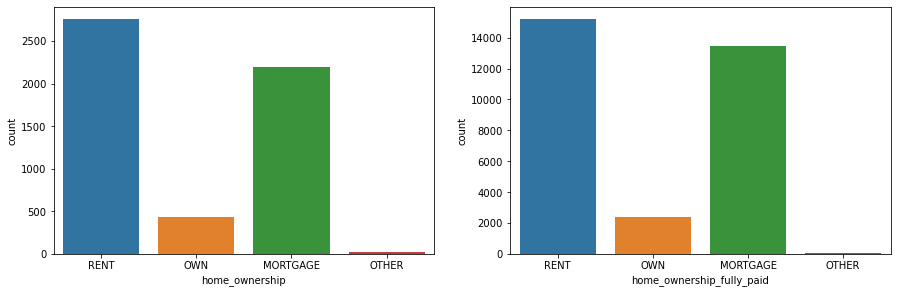

In [330]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='home_ownership', data=lending_club_CS_charged_off)
plt.xlabel('home_ownership')
plt.subplot(222)
sns.countplot(x='home_ownership', data=lending_club_CS_fully_paid)
plt.xlabel('home_ownership_fully_paid')

### b)Analyzing Purpose

Text(0.5, 0, 'purpose_fully_paid')

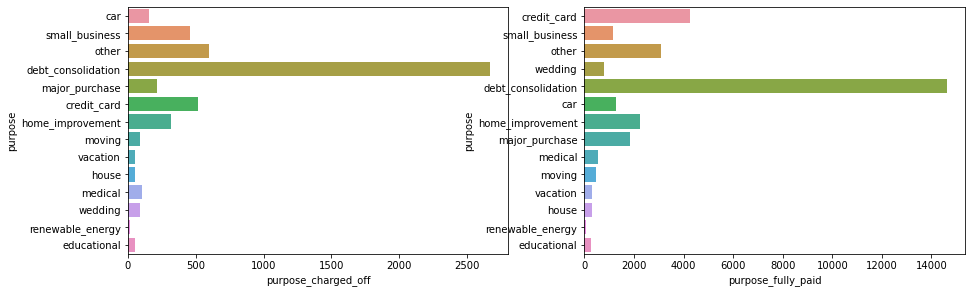

In [217]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='purpose', data=lending_club_CS_charged_off)
plt.xlabel('purpose_charged_off')
plt.subplot(222)
sns.countplot(y='purpose', data=lending_club_CS_fully_paid)
plt.xlabel('purpose_fully_paid')

### c)Analyzing Verification Status

Text(0.5, 0, 'verification_status_fully_paid')

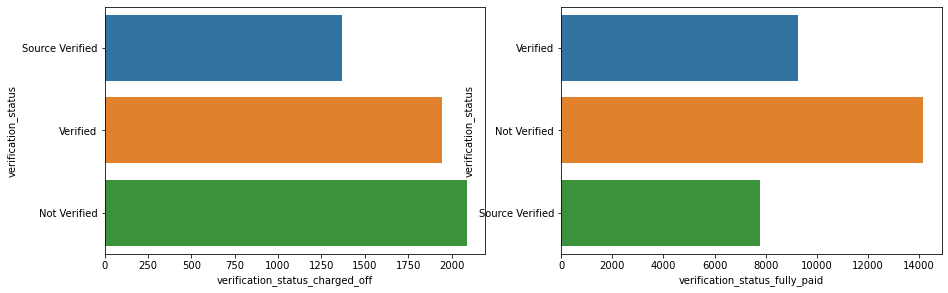

In [332]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='verification_status', data=lending_club_CS_charged_off)
plt.xlabel('verification_status_charged_off')
plt.subplot(222)
sns.countplot(y='verification_status', data=lending_club_CS_fully_paid)
plt.xlabel('verification_status_fully_paid')

### d)Analyzing Grade Status

Text(0.5, 0, 'grade_fully_paid')

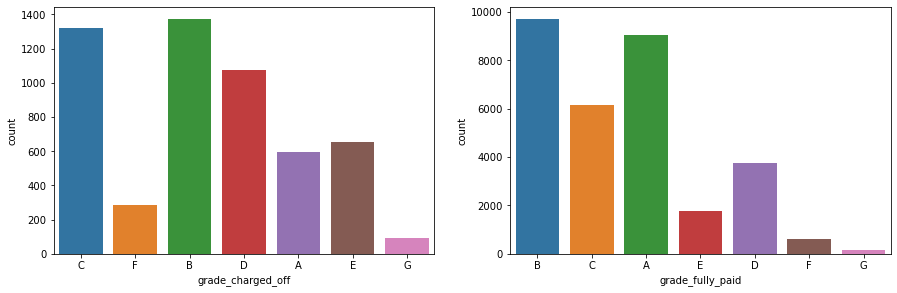

In [220]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='grade', data=lending_club_CS_charged_off)
plt.xlabel('grade_charged_off')
plt.subplot(222)
sns.countplot(x='grade', data=lending_club_CS_fully_paid)
plt.xlabel('grade_fully_paid')

### e)Analyzing Employment Length

Text(0.5, 0, 'emp_length_fully_paid')

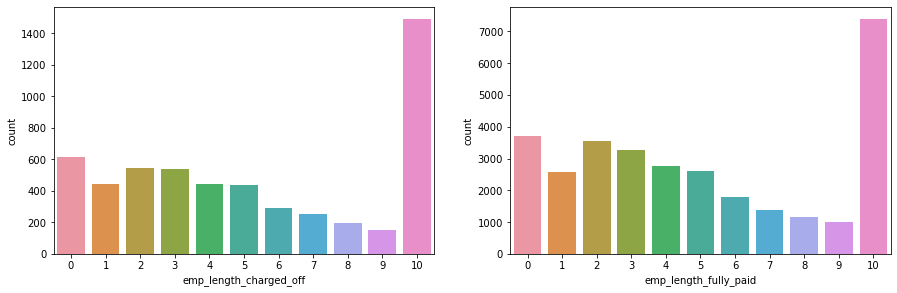

In [230]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='emp_length', data=lending_club_CS_charged_off)
plt.xlabel('emp_length_charged_off')
plt.subplot(222)
sns.countplot(x='emp_length', data=lending_club_CS_fully_paid)
plt.xlabel('emp_length_fully_paid')

#### Some numerical values are made categorical by dividing them into bins and then analyzing them becomes simpler.

In [222]:
lending_club_CS_charged_off['int_rate_groups'] = pd.cut(lending_club_CS_charged_off['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lending_club_CS_charged_off['open_acc_groups'] = pd.cut(lending_club_CS_charged_off['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lending_club_CS_charged_off['revol_util_groups'] = pd.cut(lending_club_CS_charged_off['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
lending_club_CS_charged_off['total_acc_groups'] = pd.cut(lending_club_CS_charged_off['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
lending_club_CS_charged_off['annual_inc_groups'] = pd.cut(lending_club_CS_charged_off['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [224]:
lending_club_CS_charged_off.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
8,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,...,2,11,0,32.6,13,21%-24%,10-19,20-40,2-20,31k-58k
9,5375,5350.0,60 months,12.69,121.45,B,B5,0,RENT,15000.0,...,0,2,0,36.5,3,9%-13%,2-10,20-40,2-20,3k-31k
12,9000,9000.0,36 months,13.49,305.38,C,C1,0,RENT,30000.0,...,1,4,0,91.7,9,13%-17%,2-10,80-100,2-20,3k-31k
14,10000,10000.0,36 months,10.65,325.74,B,B2,3,RENT,100000.0,...,2,14,0,55.5,29,9%-13%,10-19,40-60,20-37,85k-112k


In [223]:
lending_club_CS_fully_paid['int_rate_groups'] = pd.cut(lending_club_CS_fully_paid['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lending_club_CS_fully_paid['open_acc_groups'] = pd.cut(lending_club_CS_fully_paid['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lending_club_CS_fully_paid['revol_util_groups'] = pd.cut(lending_club_CS_fully_paid['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
lending_club_CS_fully_paid['total_acc_groups'] = pd.cut(lending_club_CS_fully_paid['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
lending_club_CS_fully_paid['annual_inc_groups'] = pd.cut(lending_club_CS_fully_paid['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [225]:
lending_club_CS_fully_paid.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k
6,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,...,1,7,0,85.6,11,13%-17%,2-10,80-100,2-20,31k-58k


### f)Analyzing Interest Rate

Text(0.5, 0, 'int_rate_fully_paid')

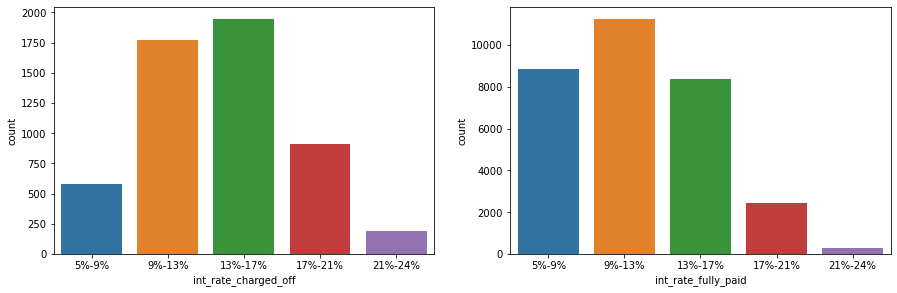

In [231]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=lending_club_CS_charged_off)
plt.xlabel('int_rate_charged_off')
plt.subplot(222)
sns.countplot(x='int_rate_groups', data=lending_club_CS_fully_paid)
plt.xlabel('int_rate_fully_paid')

### g)Analyzing Open Accounts

Text(0.5, 0, 'open_acc_fully_paid')

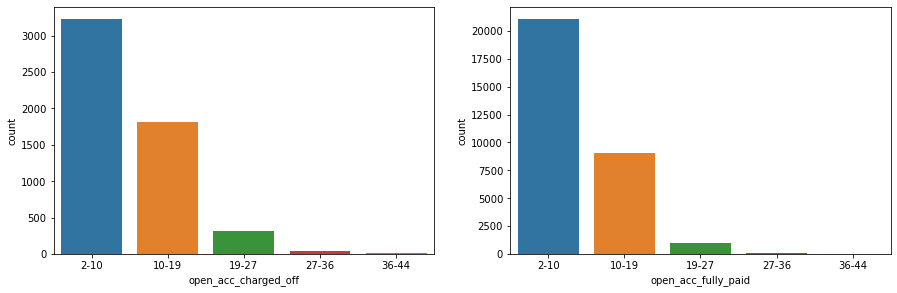

In [232]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='open_acc_groups', data=lending_club_CS_charged_off)
plt.xlabel('open_acc_charged_off')
plt.subplot(222)
sns.countplot(x='open_acc_groups', data=lending_club_CS_fully_paid)
plt.xlabel('open_acc_fully_paid')

### h)Analyzing Revol Util

Text(0.5, 0, 'revol_util_fully_paid')

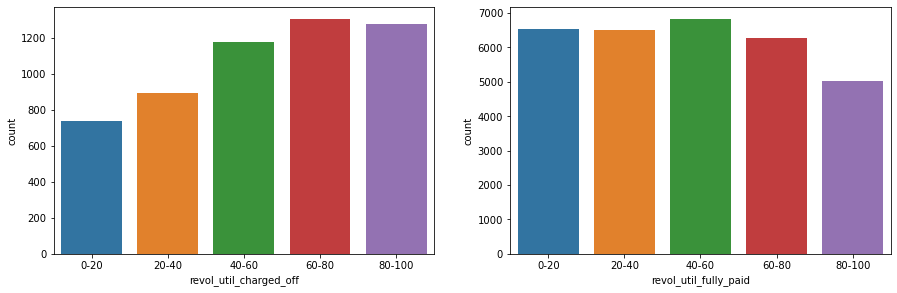

In [233]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='revol_util_groups', data=lending_club_CS_charged_off)
plt.xlabel('revol_util_charged_off')
plt.subplot(222)
sns.countplot(x='revol_util_groups', data=lending_club_CS_fully_paid)
plt.xlabel('revol_util_fully_paid')

### i)Analyzing Total Accounts

Text(0.5, 0, 'total_acc_fully_paid')

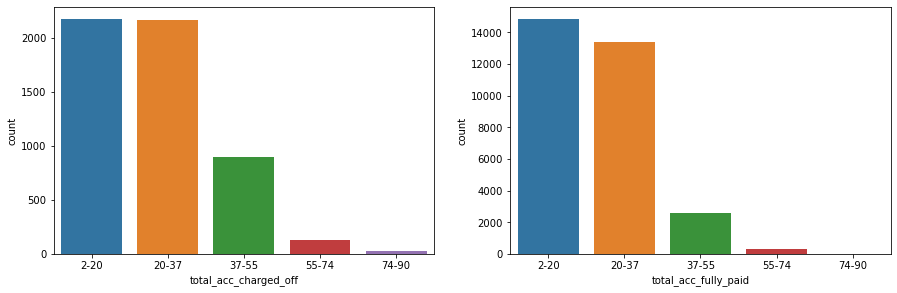

In [234]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='total_acc_groups', data=lending_club_CS_charged_off)
plt.xlabel('total_acc_charged_off')
plt.subplot(222)
sns.countplot(x='total_acc_groups', data=lending_club_CS_fully_paid)
plt.xlabel('total_acc_fully_paid')

### j) Analyzing Annual Income

Text(0.5, 0, 'annual_inc_fully_paid')

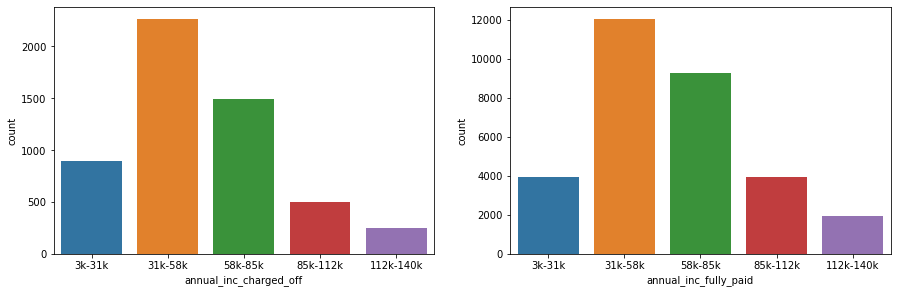

In [235]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='annual_inc_groups', data=lending_club_CS_charged_off)
plt.xlabel('annual_inc_charged_off')
plt.subplot(222)
sns.countplot(x='annual_inc_groups', data=lending_club_CS_fully_paid)
plt.xlabel('annual_inc_fully_paid')

### k) Analyzing Inquiry in last 6 months (inq_last_6mths)

Text(0.5, 0, 'inq_last_6mths_fully_paid')

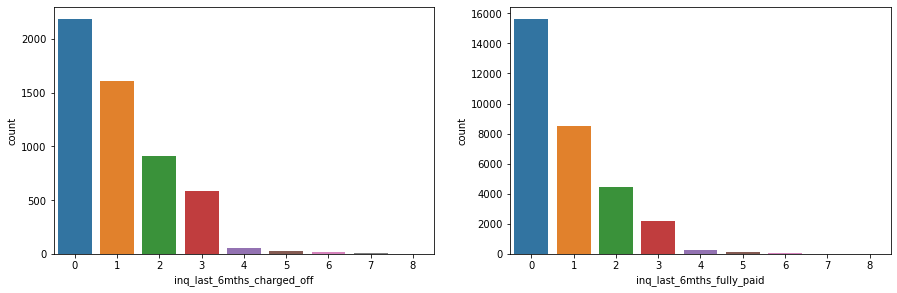

In [236]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='inq_last_6mths', data=lending_club_CS_charged_off)
plt.xlabel('inq_last_6mths_charged_off')
plt.subplot(222)
sns.countplot(x='inq_last_6mths', data=lending_club_CS_fully_paid)
plt.xlabel('inq_last_6mths_fully_paid')

### l) Analyzing Public Records Count

Text(0.5, 0, 'pub_rec_fully_paid')

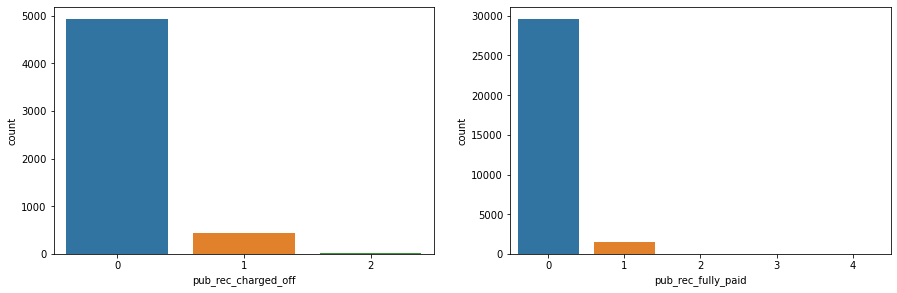

In [237]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='pub_rec', data=lending_club_CS_charged_off)
plt.xlabel('pub_rec_charged_off')
plt.subplot(222)
sns.countplot(x='pub_rec', data=lending_club_CS_fully_paid)
plt.xlabel('pub_rec_fully_paid')

### m) Analyzing by issue date (issue_d)
•	We need to create two new columns ‘issue_month’ and ‘issue_year’ for both the date frames.                
•	Then we analyse the data plotting them in countplot


In [250]:
lending_club_CS_charged_off['issue_month'] = lending_club_CS_charged_off['issue_d'].apply(lambda x: x.split('-')[0])
lending_club_CS_charged_off['issue_year'] = '20' + lending_club_CS_charged_off['issue_d'].apply(lambda x: x.split('-')[-1])

In [248]:
lending_club_CS_fully_paid['issue_month'] = lending_club_CS_fully_paid['issue_d'].apply(lambda x: x.split('-')[0])
lending_club_CS_fully_paid['issue_year'] = '20' + lending_club_CS_fully_paid['issue_d'].apply(lambda x: x.split('-')[-1])

Text(0.5, 0, 'issue_month_fully_paid')

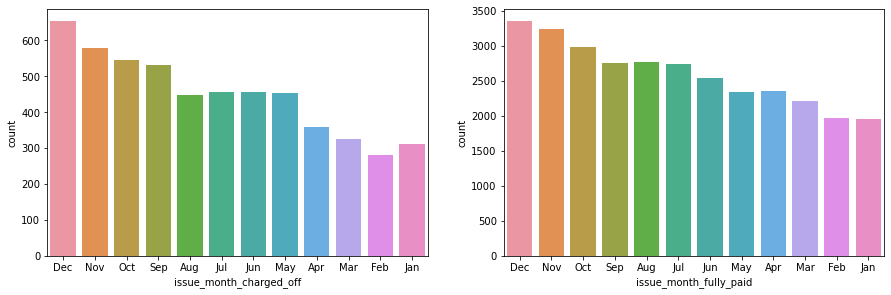

In [251]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='issue_month', data=lending_club_CS_charged_off)
plt.xlabel('issue_month_charged_off')
plt.subplot(222)
sns.countplot(x='issue_month', data=lending_club_CS_fully_paid)
plt.xlabel('issue_month_fully_paid')

Text(0.5, 0, 'issue_year_fully_paid')

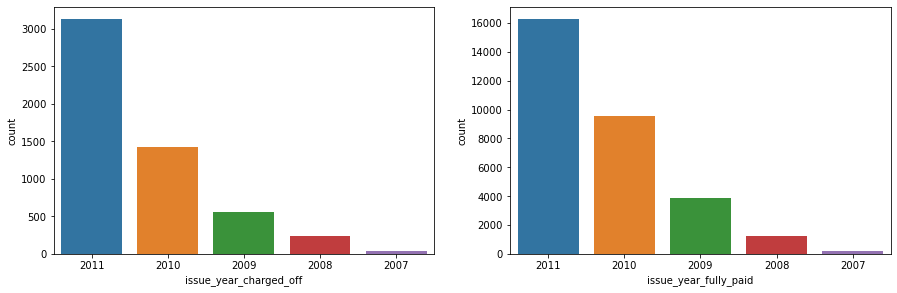

In [252]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='issue_year', data=lending_club_CS_charged_off)
plt.xlabel('issue_year_charged_off')
plt.subplot(222)
sns.countplot(x='issue_year', data=lending_club_CS_fully_paid)
plt.xlabel('issue_year_fully_paid')

#### Some numerical values are made categorical by dividing them into bins and then analyzing them becomes simpler.
•	installment                                                                                                
•	funded_amnt_inv                                                                                             
•	loan_amnt                                                                                                    
•	dti                                     


In [253]:
lending_club_CS_charged_off['installment_groups'] = pd.cut(lending_club_CS_charged_off['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lending_club_CS_charged_off['funded_amnt_inv_group'] = pd.cut(lending_club_CS_charged_off['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
lending_club_CS_charged_off['loan_amnt_groups'] = pd.cut(lending_club_CS_charged_off['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lending_club_CS_charged_off['dti_groups'] = pd.cut(lending_club_CS_charged_off['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [254]:
lending_club_CS_fully_paid['installment_groups'] = pd.cut(lending_club_CS_fully_paid['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lending_club_CS_fully_paid['funded_amnt_inv_group'] = pd.cut(lending_club_CS_fully_paid['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
lending_club_CS_fully_paid['loan_amnt_groups'] = pd.cut(lending_club_CS_fully_paid['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lending_club_CS_fully_paid['dti_groups'] = pd.cut(lending_club_CS_fully_paid['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

### n) Analyzing installment

Text(0.5, 0, 'installment_groups_fully_paid')

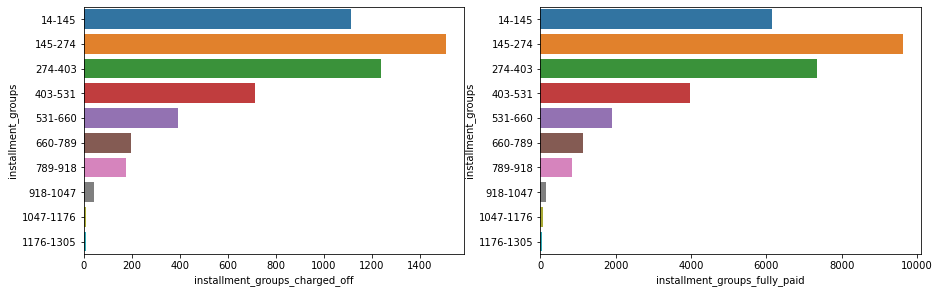

In [256]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='installment_groups', data=lending_club_CS_charged_off)
plt.xlabel('installment_groups_charged_off')
plt.subplot(222)
sns.countplot(y='installment_groups', data=lending_club_CS_fully_paid)
plt.xlabel('installment_groups_fully_paid')

### o) Analyzing funded_amnt_inv

Text(0.5, 0, 'funded_amnt_inv_group_fully_paid')

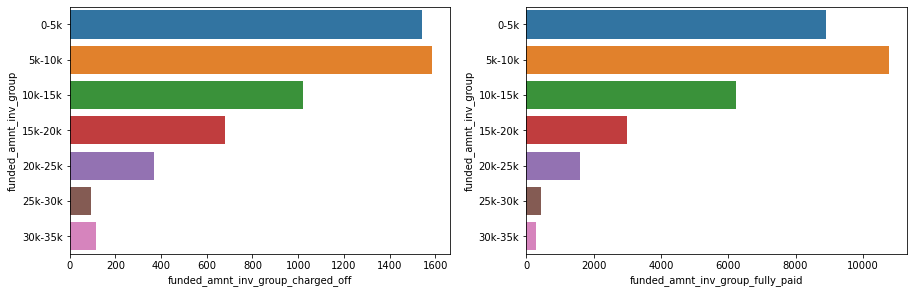

In [257]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='funded_amnt_inv_group', data=lending_club_CS_charged_off)
plt.xlabel('funded_amnt_inv_group_charged_off')
plt.subplot(222)
sns.countplot(y='funded_amnt_inv_group', data=lending_club_CS_fully_paid)
plt.xlabel('funded_amnt_inv_group_fully_paid')

### p) Analyzing Loan amount

Text(0.5, 0, 'loan_amnt_groups_fully_paid')

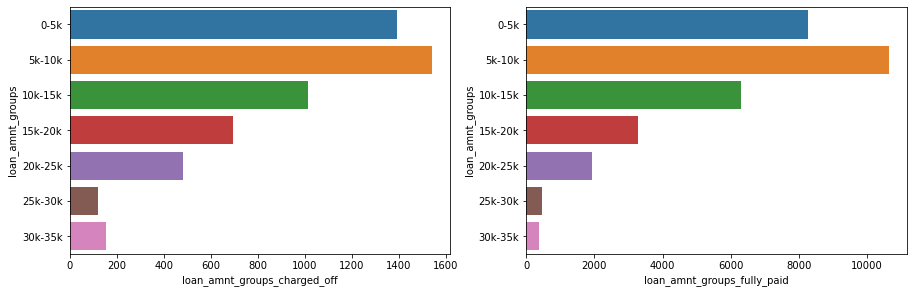

In [258]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='loan_amnt_groups', data=lending_club_CS_charged_off)
plt.xlabel('loan_amnt_groups_charged_off')
plt.subplot(222)
sns.countplot(y='loan_amnt_groups', data=lending_club_CS_fully_paid)
plt.xlabel('loan_amnt_groups_fully_paid')

### q) Analyzing dti

Text(0.5, 0, 'dti_groups_fully_paid')

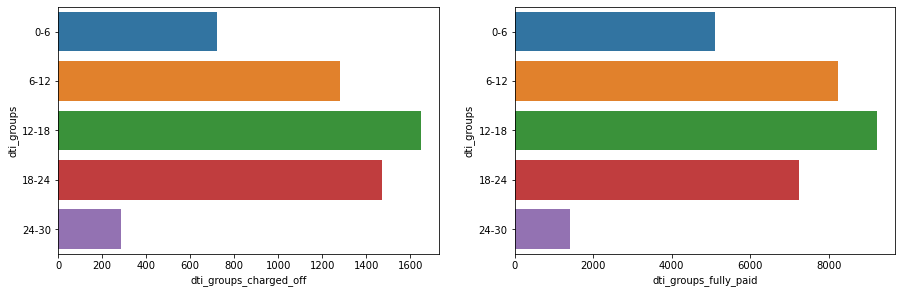

In [259]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(y='dti_groups', data=lending_club_CS_charged_off)
plt.xlabel('dti_groups_charged_off')
plt.subplot(222)
sns.countplot(y='dti_groups', data=lending_club_CS_fully_paid)
plt.xlabel('dti_groups_fully_paid')

## Observations from Categorial Data Analysis 
On comparing between applicants who have defaulted & applicants who have fully paid their loan below categories shows a higher trend of defaulting their loans:-
1.	The applicants who mostly are on rent .
2.	Mostly the ‘B , C’ grade applicants.
3.	The applicants who are charged 13-17% of interest rate .
4.	Revol_Util for applicants between range 60-80 .
5.	Loan applications mostly in Dec and 2011
6.	Funded amount invested is between 5k-10k


Also below are some trend which is visible both for defaulters and full paid applicants so there is no much concluding significance to note from them:-
1.	The applicants who mostly apply for loan for debt consolidation.
2.	Applicants having <=10 yrs. of employment length 
3.	The verification status is not verified 
4.	Open account 2-10
5.	Annual income 31k – 58k
6.	Dti between 12-18

#### Annual Income vs Home Ownership

Text(0.5, 0, 'annual_inc vs home_ownership')

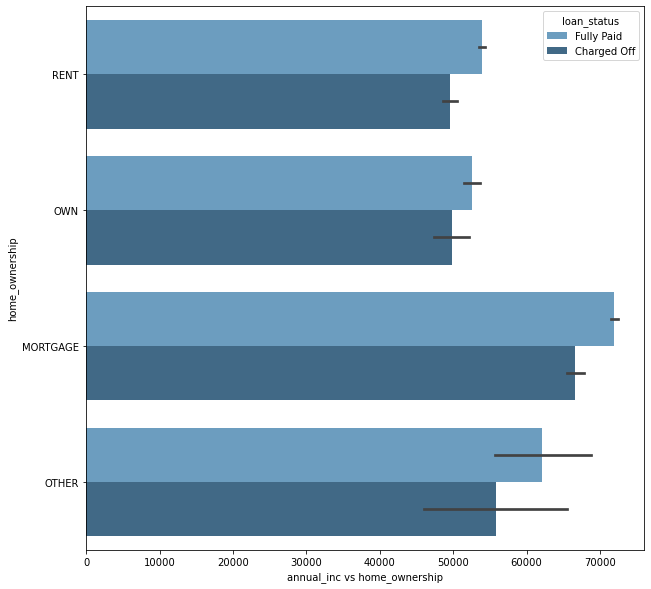

In [299]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='annual_inc', y='home_ownership', hue ='loan_status',palette="Blues_d")
plt.xlabel('annual_inc vs home_ownership')


#### Annual Income vs Loan Purpose

Text(0.5, 0, 'annual_inc vs purpose')

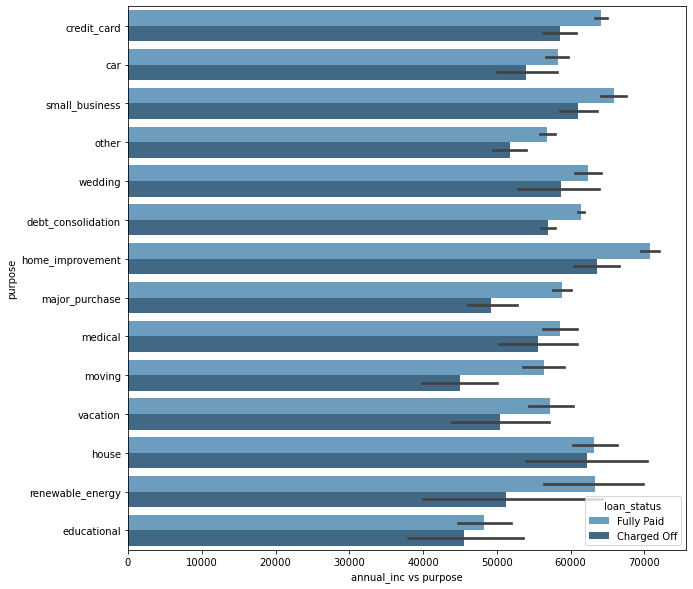

In [304]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='annual_inc', y='purpose', hue ='loan_status',palette="Blues_d")
plt.xlabel('annual_inc vs purpose')

#### Annual Income vs Loan Amount

In [296]:
lending_club_CS['annual_inc_groups'] = pd.cut(lending_club_CS['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

Text(0.5, 0, 'annual_inc vs loan_amnt')

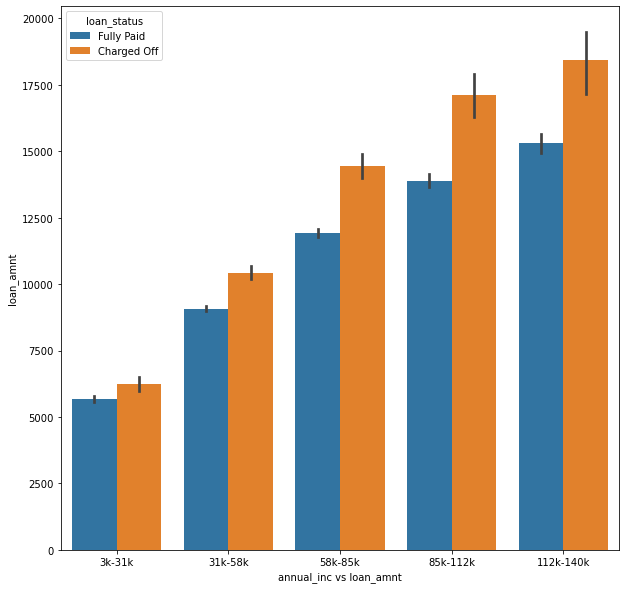

In [329]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(data =lending_club_CS,x='annual_inc_groups', y='loan_amnt', hue ='loan_status')
plt.xlabel('annual_inc vs loan_amnt')

#### Annual Income vs Interest Rate

In [291]:
lending_club_CS['int_rate_groups'] = pd.cut(lending_club_CS['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

Text(0.5, 0, 'annual_inc vs int_rate_groups ')

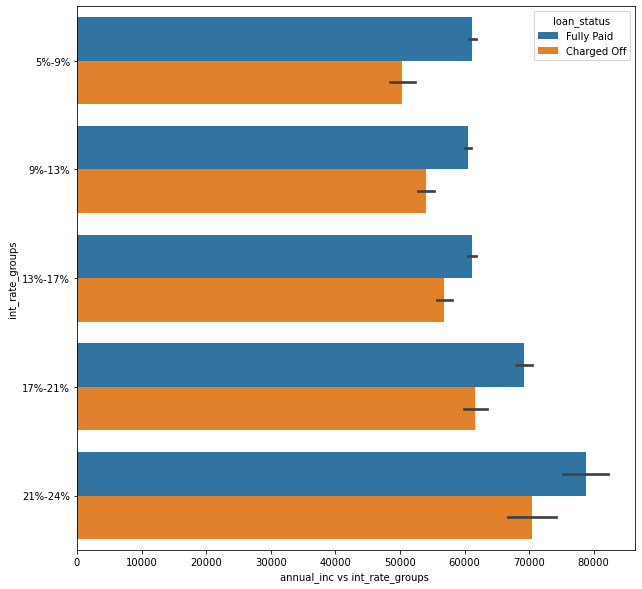

In [295]:
fig, ax = plt.subplots(figsize = (10,10))
sns.barplot(data =lending_club_CS,x='annual_inc', y='int_rate_groups', hue ='loan_status')
plt.xlabel('annual_inc vs int_rate_groups ')


#### Loan Amount vs Interest Rate

In [306]:
lending_club_CS['loan_amnt_groups'] = pd.cut(lending_club_CS['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

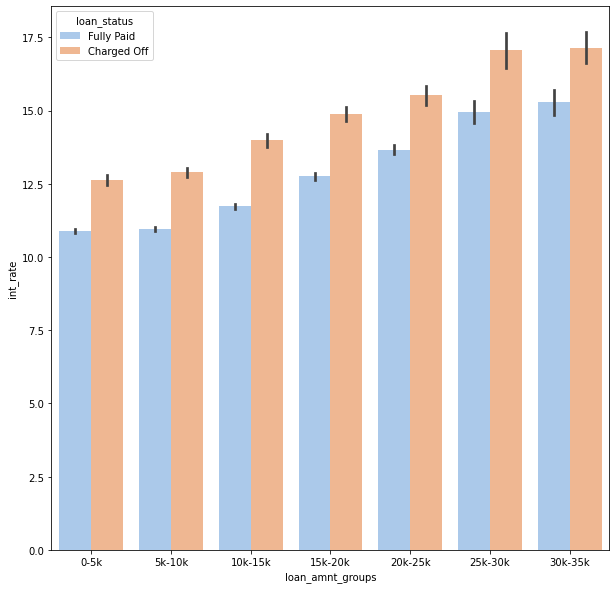

In [307]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Loan Purpose

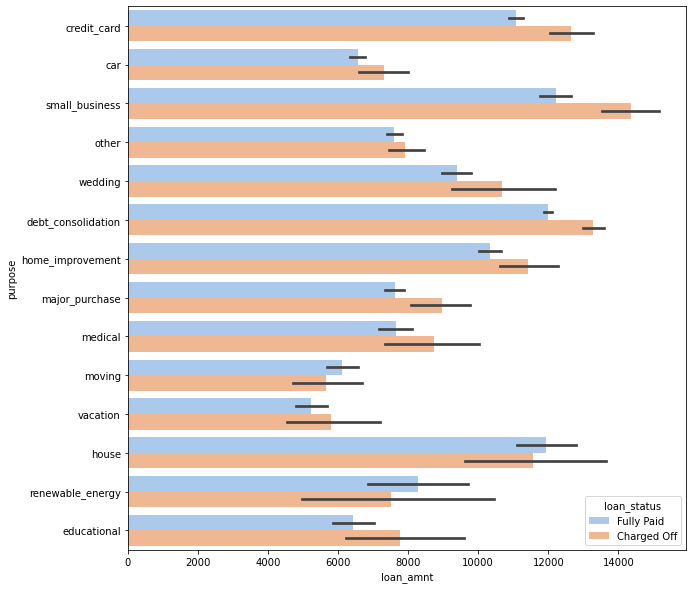

In [309]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Home Ownership

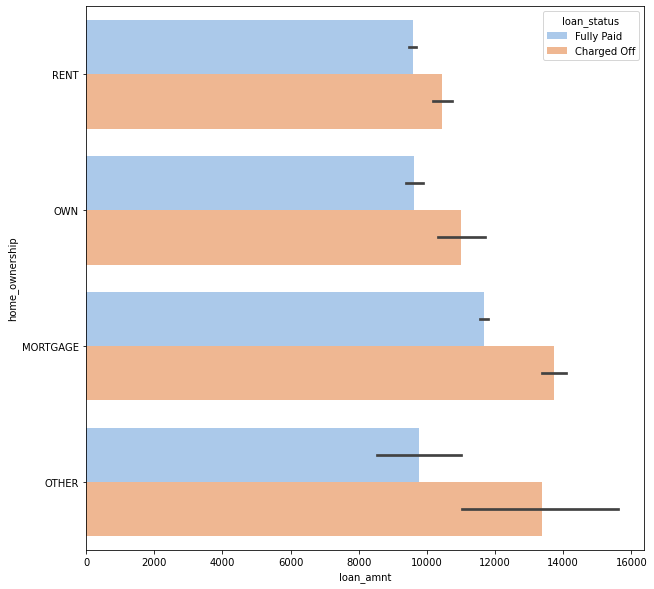

In [310]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Month Issued 

In [311]:
lending_club_CS['issue_month'] = lending_club_CS['issue_d'].apply(lambda x: x.split('-')[0])
lending_club_CS['issue_year'] = '20' + lending_club_CS['issue_d'].apply(lambda x: x.split('-')[-1])

Text(0.5, 0, 'Loan Amount vs Issue Year')

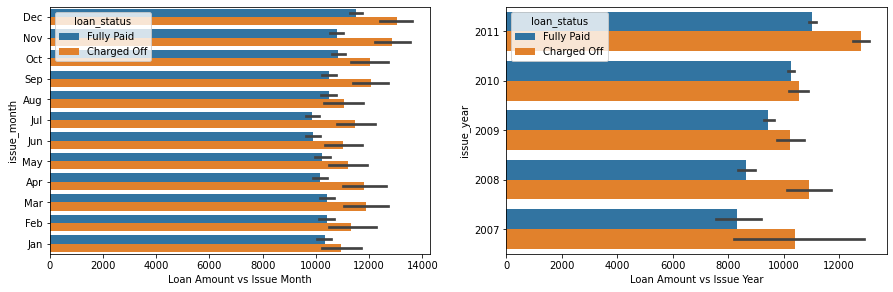

In [335]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.barplot(data =lending_club_CS,x='loan_amnt', y='issue_month', hue ='loan_status')
plt.xlabel('Loan Amount vs Issue Month')
plt.subplot(222)
sns.barplot(data =lending_club_CS,x='loan_amnt', y='issue_year', hue ='loan_status')
plt.xlabel('Loan Amount vs Issue Year')

#### Loan Amount vs Grade

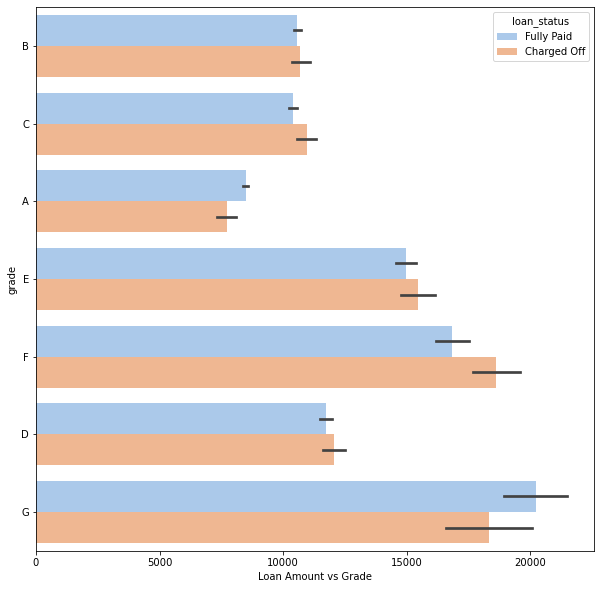

In [316]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel")
plt.xlabel('Loan Amount vs Grade')
plt.show()

#### Grade vs Interest Rate

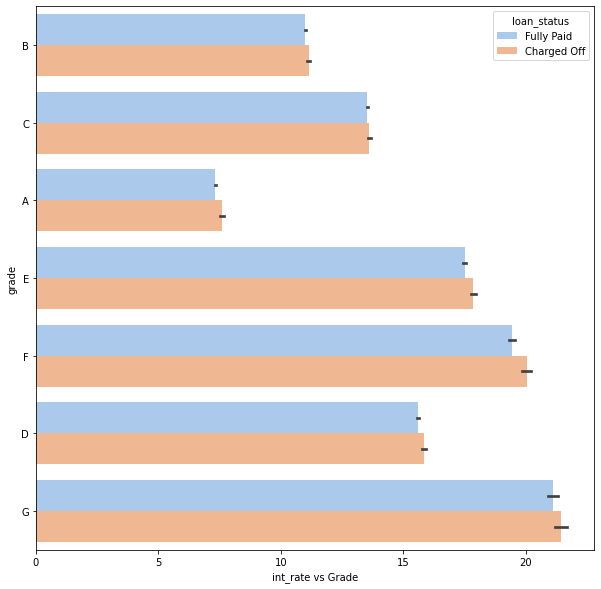

In [319]:
plt.figure(figsize=(10,10))
sns.barplot(data =lending_club_CS,x='int_rate', y='grade', hue ='loan_status',palette="pastel")


plt.show()

#### Term vs Loan Amount

Text(0.5, 20.80000000000002, 'term vs loan_amnt')

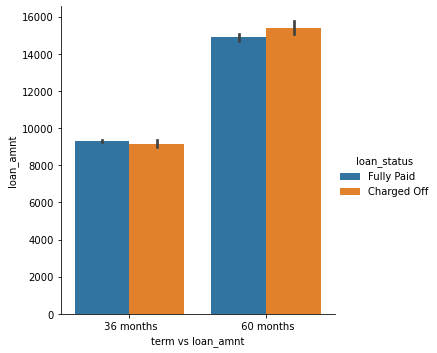

In [325]:
sns.catplot(x = 'term', y = 'loan_amnt', data = lending_club_CS,hue = 'loan_status', kind = 'bar')
plt.xlabel('term vs loan_amnt')

## Observations on Complete Analysis 

#### The analysis with respect to the defaulters or charged off loans. Chances of defaulting is more when:
1.	The applicants home ownership is ‘MORTGAGE’ and their income range fall between 60-70k
2.	The applicants with high annual income tend to apply for loan with purpose as ‘home improvement’ , ‘house’ , ‘renewable energy’ , ‘small business’ also the defaulters are mostly found to be from ‘home improvement’ , ‘house’ , ‘small business’.
3.	Applicants whose annual income is between 112k-140k and  take up the loan amount ranging between 17.5k – 20k tend to default more.
4.	Applicants of annual income range between 70k – 80k and take up loan at an interest rate of 21-24% tend to default more.
5.	Applicants applying for loan amount between 25k-30k and 30k-35k and interest rate charged around 17.5% tend to default more.
6.	Applicants who apply for loan amount of around 14k for the purpose of small business or debt consolidation tend to default more.
7.	Applicants who apply for loan amount of around 14k and stay on Mortgage tend to default more.
8.	Applicants mostly defaulted when they applied for loan in the month of December during year ending and mostly in 2011 for loan amount of around 12k – 14k
9.	Applicants who defaulted mostly fall in Grade G,F category and the loan amount taken is 15k-20k
10.	Applicants with Grade G,F when charged with interest rate of around 20% tend to default more.

